In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_excel('/content/gdrive/MyDrive/comand/demographics.xls')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Данные**

In [ ]:
data

,ID,Study,Group,Subjnum,Gender,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
0,GaPt03,Ga,PD,3,female,82,1.45,50.0,3.0,20.0,10.0,36.34,NaN,0.778
1,GaPt04,Ga,PD,4,male,68,1.71,NaN,2.5,25.0,8.0,11.00,0.642,0.818
2,GaPt05,Ga,PD,5,female,82,1.53,51.0,2.5,24.0,5.0,14.50,0.908,0.614
3,GaPt06,Ga,PD,6,male,72,1.70,82.0,2.0,16.0,13.0,10.47,0.848,0.937
4,GaPt07,Ga,PD,7,female,53,1.67,54.0,3.0,44.0,22.0,18.34,0.677,0.579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,SiCo26,Si,CO,26,male,60,1.74,72.0,NaN,NaN,NaN,9.20,1.000,NaN
162,SiCo27,Si,CO,27,male,67,1.90,95.0,NaN,NaN,NaN,12.52,1.120,NaN
163,SiCo28,Si,CO,28,male,61,1.70,72.0,NaN,NaN,NaN,12.65,0.990,NaN
164,SiCo29,Si,CO,29,male,53,1.70,87.0,NaN,NaN,NaN,11.41,1.290,NaN


Имена файлов с данными:  
Файлы данных имеют названия в формате:  
**[Код исследования][Тип субъекта][Номер субъекта]_[Номер ходьбы].txt**

Они соответствуют общепринятому соглашению, например, GaCo01_02.txt или JuPt03_06.txt,
где

Ga, Ju или Si — указывают на исследование, в котором были получены данные:  

    Ga — Галит Йогев и др. (двойная задача при БП; Eur J Neuro, 2005)
    Ju — Хаусдорф и др. (RAS при БП; Eur J Neuro, 2007)
    Si — Сильви Френкель-Толедо и др. (Ходьба на беговой дорожке при БП; Mov Disorders,
          2005)

Co или PD: контрольный субъект или пациент с БП

01: номер субъекта в группе

Номер шага 10 (для исследования «Ga») указывает на выполнение двух задач во время ходьбы,
когда испытуемый выполнял последовательное вычитание 7 чисел во время ходьбы.

01 – Обычная ходьба (normal walk)

10 – Ходьба с двойной задачей

.txt: расширение имени файла

**Частота дискретизации составляла 100 Гц**  


# **Шкалы**
**UPDRS**  
Диапазон оценок: 0 -260
0–10	Легкая форма  
11–30	Умеренная  
31–70	Тяжелая  
71+	Очень тяжелая    

**UPDRS-M** (только моторная часть UPDRS(III))  
Диапазон оценок: 0–132  
<=32 — лёгкая степень  
32 - 59 - умеренная  
=>59 — тяжёлая

**TUAG (Timed Up and Go Test)**  
<=10 сек — хорошая подвижность  
10–20 сек — умеренные нарушения  
=>20 сек — выраженные нарушения  

**HoehnYahr (Шкала Хена-Яра (Hoehn & Yahr Staging))**  
1 - Симптомы только на одной стороне тела (например, тремор правой руки). Нет нарушения повседневной активности.  
1.5 - Односторонние симптомы + осевое вовлечение (например, скованность в шее или спине).  
2 -	Симптомы с обеих сторон, но без нарушения баланса. Пациент может работать, но движения замедлены.  
2.5	- Двусторонние симптомы + легкая постуральная неустойчивость (может восстанавливать равновесие при толчке).  
3 -	Умеренная постуральная неустойчивость, но пациент еще самостоятелен (может ходить без посторонней помощи).  
4	- Тяжелая инвалидизация — требуется помощь при ходьбе и повседневных делах, но может стоять без поддержки.  
5	- Полная зависимость от посторонних (инвалидная коляска или постельный режим).


# **Описание**

In [ ]:
data.describe()

,Subjnum,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
count,166.000000,166.000000,163.000000,163.000000,111.000000,135.000000,135.000000,153.000000,165.000000,20.000000
mean,16.469880,65.138554,57.634233,72.558282,1.891892,21.466667,13.177778,10.918235,1.125345,0.967450
std,9.549663,9.200070,78.790179,12.095861,0.892915,17.571942,10.871616,3.476727,0.213814,0.307002
min,1.000000,36.000000,1.450000,47.000000,0.000000,0.000000,0.000000,6.230000,0.360000,0.228000
25%,8.250000,59.000000,1.655000,64.000000,2.000000,1.000000,1.000000,8.940000,1.013000,0.793000
50%,16.000000,65.000000,1.740000,72.000000,2.000000,24.000000,14.000000,10.320000,1.144000,0.955000
75%,23.750000,71.000000,160.000000,80.000000,2.500000,33.000000,21.000000,11.990000,1.261000,1.189000
max,40.000000,86.000000,185.000000,105.000000,3.000000,70.000000,44.000000,36.340000,1.542000,1.532000


In [ ]:
data_f= data[data['Gender']=='female']
data_m= data[data['Gender']=='male']



Распределение по полу:
Gender
male      98
female    68
Name: count, dtype: int64

Распределение по статусу:
Group
PD    93
CO    73
Name: count, dtype: int64

Распределение по статусу среди женщин:
Group
PD    35
CO    33
Name: count, dtype: int64

Распределение по статусу среди мужчин:
Group
PD    58
CO    40
Name: count, dtype: int64


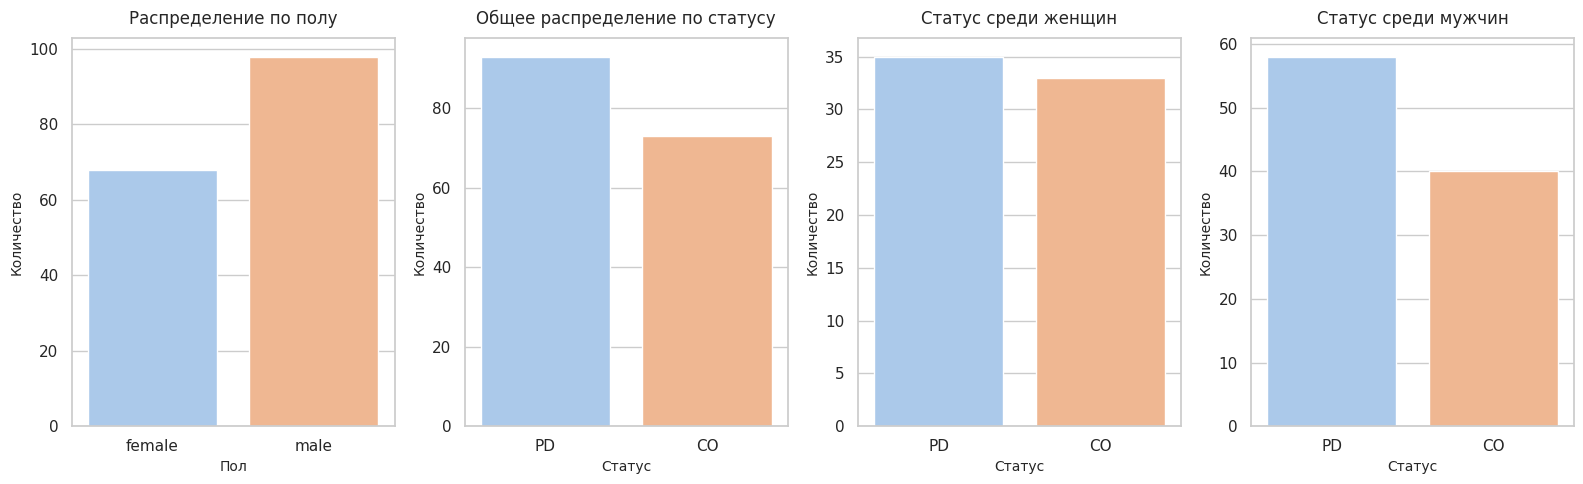

In [ ]:
print("\nРаспределение по полу:")
print(data['Gender'].value_counts())

print("\nРаспределение по статусу:")
print(data['Group'].value_counts())

print("\nРаспределение по статусу среди женщин:")
print(data_f['Group'].value_counts())

print("\nРаспределение по статусу среди мужчин:")
print(data_m['Group'].value_counts())


sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(16, 5))

plt.subplot(1, 4, 1)
ax1 = sns.countplot(x='Gender', data=data, hue='Gender', dodge=False)
plt.title('Распределение по полу', fontsize=12, pad=10)
plt.xlabel('Пол', fontsize=10)
plt.ylabel('Количество', fontsize=10)

plt.subplot(1, 4, 2)
ax2 = sns.countplot(x='Group', data=data, hue='Group', dodge=False)
plt.title('Общее распределение по статусу', fontsize=12, pad=10)
plt.xlabel('Статус', fontsize=10)
plt.ylabel('Количество', fontsize=10)

plt.subplot(1, 4, 3)
ax3 = sns.countplot(x='Group', data=data_f, hue='Group', dodge=False)
plt.title('Статус среди женщин', fontsize=12, pad=10)
plt.xlabel('Статус', fontsize=10)
plt.ylabel('Количество', fontsize=10)

plt.subplot(1, 4, 4)
ax4 = sns.countplot(x='Group', data=data_m, hue='Group', dodge=False)
plt.title('Статус среди мужчин', fontsize=12, pad=10)
plt.xlabel('Статус', fontsize=10)
plt.ylabel('Количество', fontsize=10)

plt.tight_layout()
plt.show()

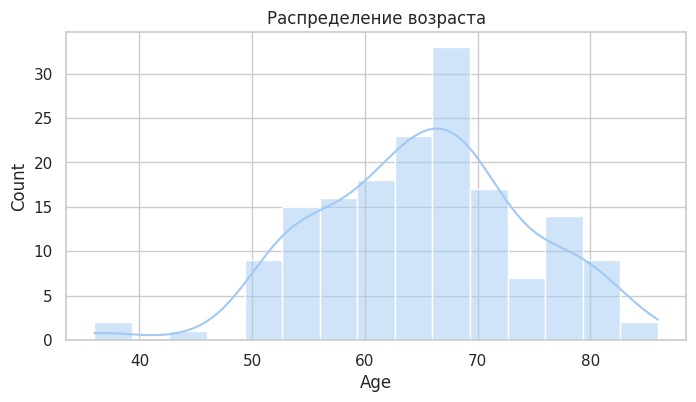

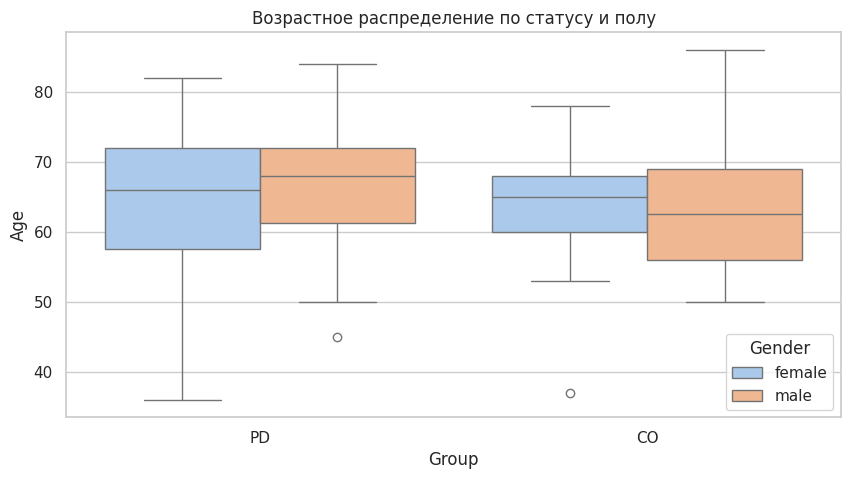

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Age'], kde=True, bins=15)
plt.title('Распределение возраста')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Group', y='Age', hue='Gender', data=data)
plt.title('Возрастное распределение по статусу и полу')
plt.show()

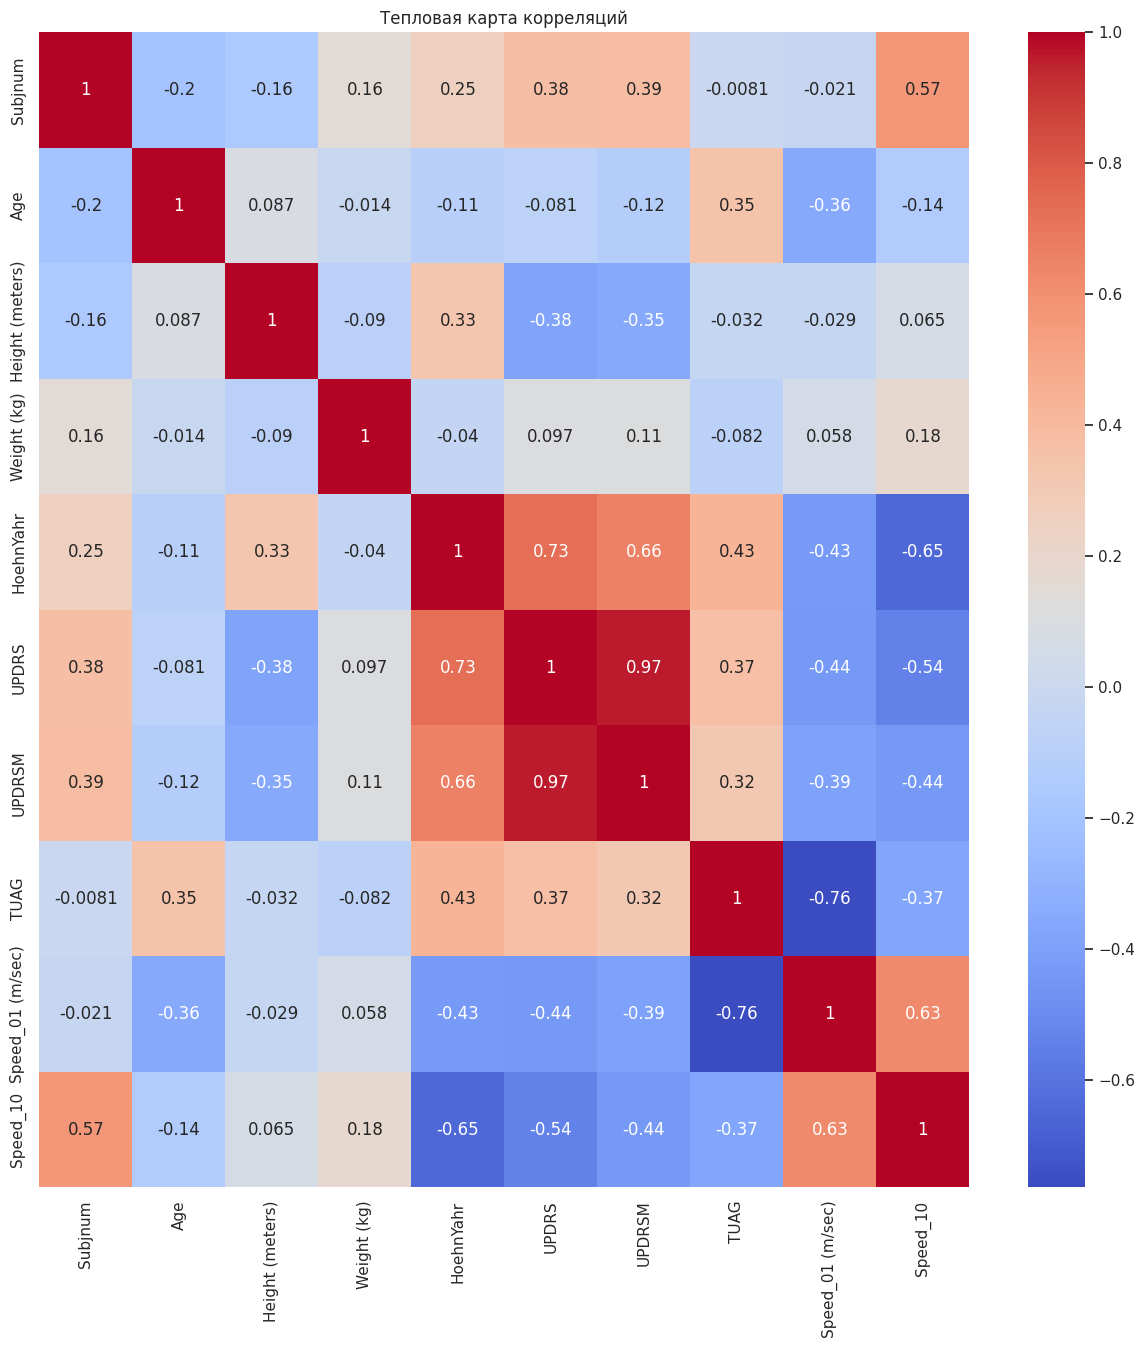

In [ ]:
# Корреляция между числовыми признаками
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляций')
plt.show()

# **Оценка по шкалам**

**UPDRS**  

Диапазон оценок: 0 - 260   
0–10	Легкая форма  
11–30	Умеренная  
31–70	Тяжелая  
71+	Очень тяжелая

In [ ]:
data_UPDRS_1 = data[data['UPDRS'] < 11]
print(f"Легкая форма у {len(data_UPDRS_1)} пациентов")
data_UPDRS_2 = data[(data['UPDRS'] > 10) & (data['UPDRS'] < 31)]
print(f"Умеренная форма у {len(data_UPDRS_2)} пациентов")
data_UPDRS_3 = data[(data['UPDRS'] > 30) & (data['UPDRS'] < 71)]
print(f"Тяжелая форма у {len(data_UPDRS_3)} пациентов")
data_UPDRS_4 = data[(data['UPDRS'] > 70)]
print(f"Очень тяжелая форма у {len(data_UPDRS_4)} пациентов")

Легкая форма у 44 пациентов
Умеренная форма у 46 пациентов
Тяжелая форма у 45 пациентов
Очень тяжелая форма у 0 пациентов


**UPDRS-M** (только моторная часть UPDRS(III))  
Диапазон оценок: 0–132  
<=32 — лёгкая степень  
32 - 59 - умеренная  
=>59 — тяжёлая

In [ ]:
data_UPDRSM_1 = data[data['UPDRSM'] < 32]
print(f"Легкая форма у {len(data_UPDRSM_1)} пациентов")
data_UPDRSM_2 = data[(data['UPDRSM'] > 32) & (data['UPDRS'] < 59)]
print(f"Умеренная форма у {len(data_UPDRSM_2)} пациентов")
data_UPDRSM_3 = data[data['UPDRSM'] > 58]
print(f"Тяжелая форма у {len(data_UPDRSM_3)} пациентов")

Легкая форма у 128 пациентов
Умеренная форма у 2 пациентов
Тяжелая форма у 0 пациентов


**TUAG (Timed Up and Go Test)**  
<=10 сек — хорошая подвижность  
10–20 сек — умеренные нарушения  
=>20 сек — выраженные нарушения  

In [ ]:
data_TUAG_1 = data[data['TUAG'] < 11]
print(f"Легкая форма у {len(data_TUAG_1)} пациентов")
data_TUAG_2 = data[(data['TUAG'] > 10) & (data['TUAG'] < 20)]
print(f"Умеренная форма у {len(data_TUAG_2)} пациентов")
data_TUAG_3 = data[data['TUAG'] > 19]
print(f"Тяжелая форма у {len(data_TUAG_3)} пациентов")

Легкая форма у 96 пациентов
Умеренная форма у 83 пациентов
Тяжелая форма у 3 пациентов


**HoehnYahr (Шкала Хена-Яра (Hoehn & Yahr Staging))**  
1 - Симптомы только на одной стороне тела (например, тремор правой руки). Нет нарушения повседневной активности.  
1.5 - Односторонние симптомы + осевое вовлечение (например, скованность в шее или спине).  
2 -	Симптомы с обеих сторон, но без нарушения баланса. Пациент может работать, но движения замедлены.  
2.5	- Двусторонние симптомы + легкая постуральная неустойчивость (может восстанавливать равновесие при толчке).  
3 -	Умеренная постуральная неустойчивость, но пациент еще самостоятелен (может ходить без посторонней помощи).  
4	- Тяжелая инвалидизация — требуется помощь при ходьбе и повседневных делах, но может стоять без поддержки.  
5	- Полная зависимость от посторонних (инвалидная коляска или постельный режим).


In [ ]:
data_HoehnYahr_10 = data[data['HoehnYahr'] == 1]
print(f"Симптомы только на одной стороне тела у {len(data_HoehnYahr_10)} пациентов")
data_HoehnYahr_15 = data[data['HoehnYahr'] == 1.5]
print(f"Односторонние симптомы + осевое вовлечение у {len(data_HoehnYahr_15)} пациентов")
data_HoehnYahr_20 = data[data['HoehnYahr'] == 2]
print(f"Симптомы с обеих сторон, но без нарушения баланса у {len(data_HoehnYahr_20)} пациентов")
data_HoehnYahr_25 = data[data['HoehnYahr'] == 2.5]
print(f"Двусторонние симптомы + легкая постуральная неустойчивость у {len(data_HoehnYahr_25)} пациентов")
data_HoehnYahr_30 = data[data['HoehnYahr'] == 3]
print(f"Умеренная постуральная неустойчивость, но пациент еще самостоятелен у {len(data_HoehnYahr_30)} пациентов")
data_HoehnYahr_40 = data[data['HoehnYahr'] == 4]
print(f"Тяжелая инвалидизация у {len(data_HoehnYahr_40)} пациентов")
data_HoehnYahr_40 = data[data['HoehnYahr'] == 5]
print(f"Полная зависимость от посторонних у {len(data_HoehnYahr_40)} пациентов")

Симптомы только на одной стороне тела у 0 пациентов
Односторонние симптомы + осевое вовлечение у 0 пациентов
Симптомы с обеих сторон, но без нарушения баланса у 55 пациентов
Двусторонние симптомы + легкая постуральная неустойчивость у 28 пациентов
Умеренная постуральная неустойчивость, но пациент еще самостоятелен у 10 пациентов
Тяжелая инвалидизация у 0 пациентов
Полная зависимость от посторонних у 0 пациентов


In [ ]:
gender_analysis = data.groupby('Gender').agg({
    'HoehnYahr': 'mean',
    'TUAG': 'mean',
    'UPDRSM': 'mean',
    'UPDRS': 'mean'
}).reset_index()

Text(0.5, 1.0, 'Распределение по стадиям Hoehn & Yahr')

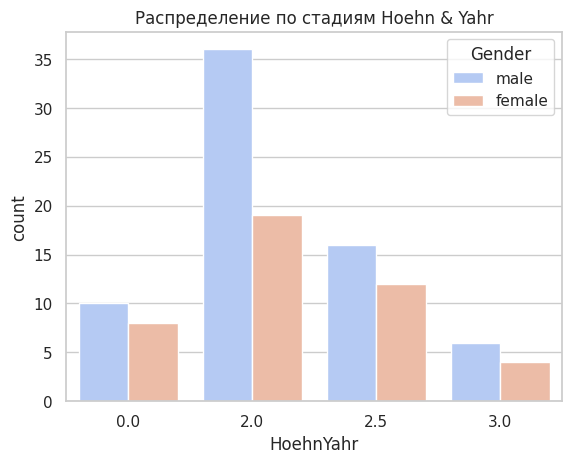

In [ ]:
# Распределение по Hoehn & Yahr
sns.countplot(x='HoehnYahr', hue='Gender', data=data, palette='coolwarm')
plt.title('Распределение по стадиям Hoehn & Yahr')

<ipython-input-61-bd1e22b3f2da>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='TUAG', data=data, palette='coolwarm')


Text(0.5, 1.0, 'Распределение времени TUAG')

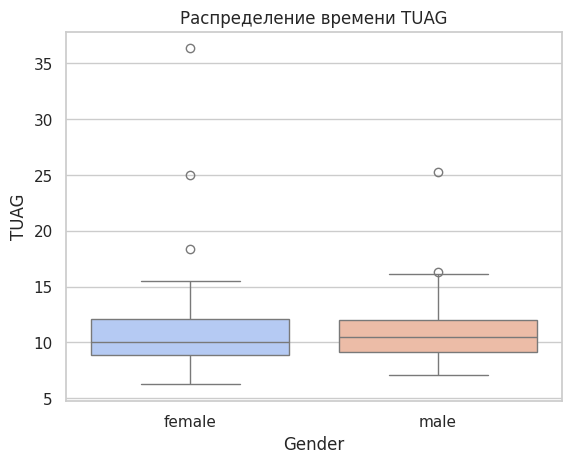

In [ ]:
sns.boxplot(x='Gender', y='TUAG', data=data, palette='coolwarm')
plt.title('Распределение времени TUAG')

<ipython-input-62-a5e51c16fc6d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='UPDRSM', data=data, palette='coolwarm')


Text(0.5, 1.0, 'Распределение баллов UPDRSM')

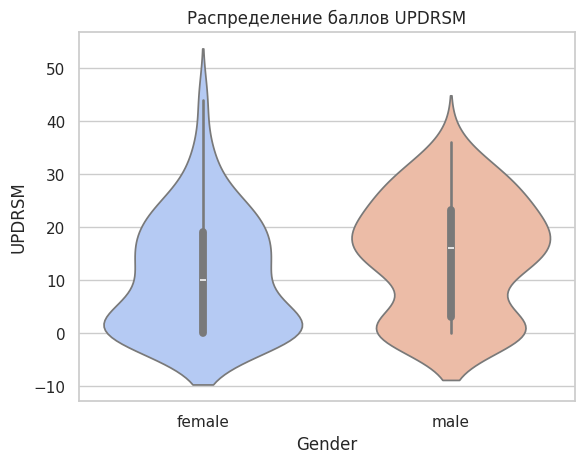

In [ ]:
sns.violinplot(x='Gender', y='UPDRSM', data=data, palette='coolwarm')
plt.title('Распределение баллов UPDRSM')

In [ ]:
def classify_severity(row):
    conditions = [
        (row['UPDRS'] < 11) & (row['TUAG'] < 11) & (row['UPDRSM'] < 32),
        (row['UPDRS'] < 31) & (row['TUAG'] < 20) & (row['UPDRSM'] < 59)
    ]
    choices = ['Легкая', 'Умеренная', 'Тяжелая']
    return choices[0] if conditions[0] else choices[1] if conditions[1] else choices[2]

In [ ]:
data['Общая_тяжесть'] = data.apply(classify_severity, axis=1)

<Figure size 1200x600 with 0 Axes>

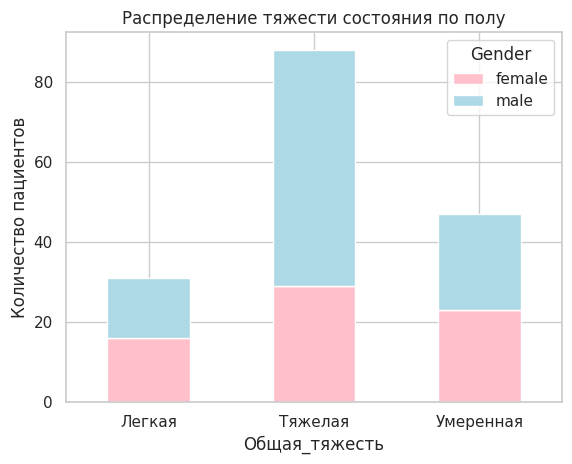

In [ ]:
plt.figure(figsize=(12, 6))
severity_counts = data.groupby(['Общая_тяжесть', 'Gender']).size().unstack()
severity_counts.plot(kind='bar', stacked=True, color=['pink', 'lightblue'])
plt.title('Распределение тяжести состояния по полу')
plt.ylabel('Количество пациентов')
plt.xticks(rotation=0)
plt.show()

In [ ]:
cross_table = pd.crosstab(
    index=[data['Общая_тяжесть'], data['Gender']],
    columns=[pd.cut(data['HoehnYahr'], bins=[0, 1.5, 2.5, 5], labels=['1-1.5', '2-2.5', '3-5'])]
)
print("Таблица соответствия тяжести и стадий Hoehn & Yahr:")
print(cross_table)

Таблица соответствия тяжести и стадий Hoehn & Yahr:
HoehnYahr             2-2.5  3-5
Общая_тяжесть Gender            
Тяжелая       female     11    3
              male       30    5
Умеренная     female     20    1
              male       22    1


In [ ]:
import pandas as pd

# Создаем DataFrame с нужными данными
result = data[['ID']].copy()
result['label'] = data['Group'].map({'CO': 0, 'PD': 1})

# Сохраняем в CSV с разделителем "-" и без заголовков
result.to_csv('file_labels.csv',
             sep='-',
             index=False,
             header=False,
             encoding='utf-8')

print(f"Файл 'file_labels.csv' успешно создан")
print("Первые 5 строк:")
print("\n".join(result.head().apply(lambda x: f"{x['ID']}-{x['label']}", axis=1).tolist()))

Файл 'file_labels.csv' успешно создан
Первые 5 строк:
GaPt03-1
GaPt04-1
GaPt05-1
GaPt06-1
GaPt07-1
